In [1]:
# Bangalore house price prediction -Supervised Regression Problem

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r"C:\Users\Rohan Singh\Downloads\Bengaluru_House_Data (1).csv"
df_raw=pd.read_csv(path)
df_raw.shape

(13320, 9)

In [5]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df=df_raw.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


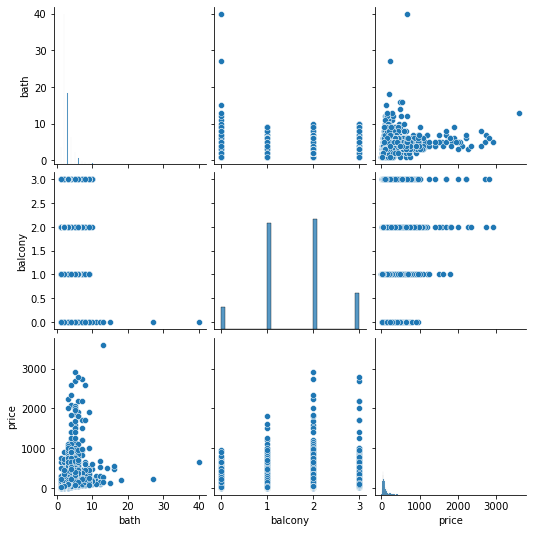

In [9]:
sns.pairplot(df)

In [10]:
# count unique features of house of each features
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print(" ")

In [11]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
 
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
 
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
 
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom    

<AxesSubplot:>

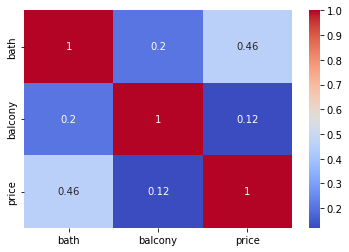

In [12]:
# correlation heatmap
num_vars=["bath","balcony","price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm",annot=True)

# Data Cleaning

In [13]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [15]:
# society has 41.3% missing value

In [16]:
# visualize heatmap using heatmap

<AxesSubplot:>

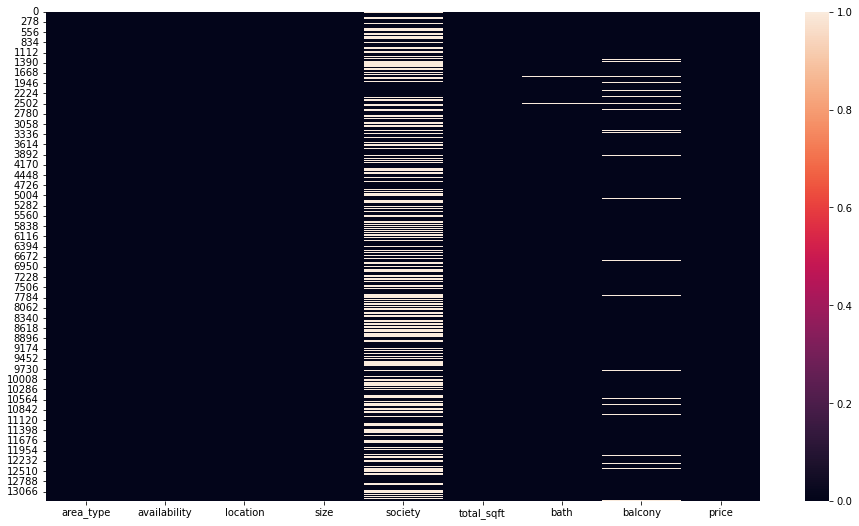

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [18]:
df2=df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [19]:
# fill mean value in balcony features as it contains 4.5% missing values

In [20]:
df2['balcony']=df2['balcony'].fillna(df2['balcony'].mean())

In [21]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [22]:
# drop rows with missing values

In [23]:
df3=df2.dropna()
df3.shape

(13246, 8)

In [24]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [25]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [26]:
# feature engineering

In [27]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [28]:
# Convert "total_sqft" categorical variable to  numeric

In [29]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [30]:
# here we observe that 'total sqft' contain string value in different formats
# float,int like value ,817,1689.342
# number and string
# best strategy is to convert it to number by splitting it

In [31]:
total_sqft_int=[]
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))
    except:
        try:
            temp=[]
            temp=str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [32]:
df4=df3.reset_index(drop=True)
# don't ad  index column in df

In [33]:
df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [34]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [35]:
df6=df5.dropna()
df6.shape

(13200, 9)

In [36]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


# working on size variable

In [37]:
df6['size'].value_counts()
# size features show the number of rooms

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [38]:
# we are assuming BHK==Bedroom==RK
size_int =[]
for str_val in df6['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice = ",str_val)

In [39]:
df6=df6.reset_index(drop=True)


In [40]:
df7=df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [41]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [42]:
# finding outlier and removing

In [43]:
# to understand the data
# function to create histograms,q-q plot and boxplot
# for q-q plots
import scipy.stats as stats
def diagnostic_plots(df,variable):
    
#   function takes the dataframe and variable of interest as arguments
    plt.figure(figsize=(16,4))
#   histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable],bins=30)
    plt.title('Histogram')
    
#     q-q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.ylabel('Variable quantiles')
    
#     boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
    

******* bath *******


C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


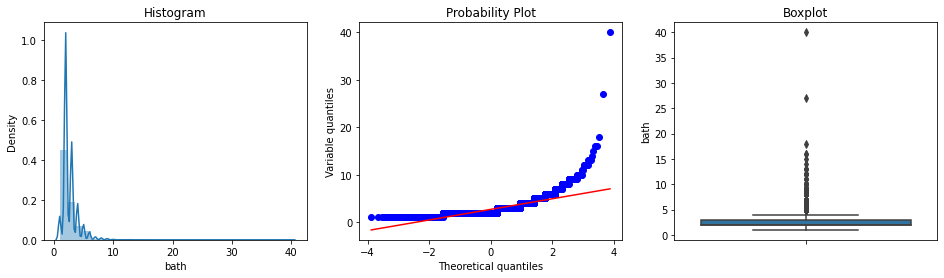

******* balcony *******


C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


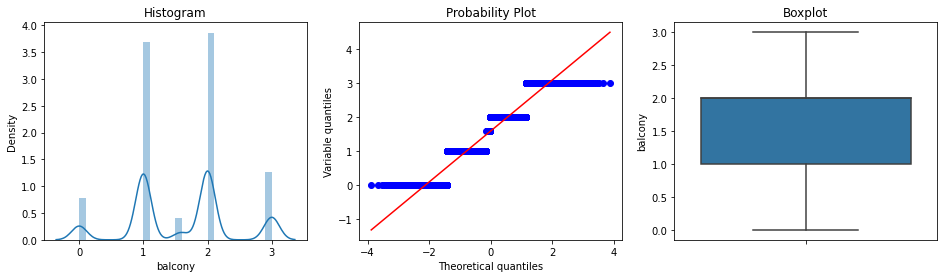

******* total_sqft_int *******


C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


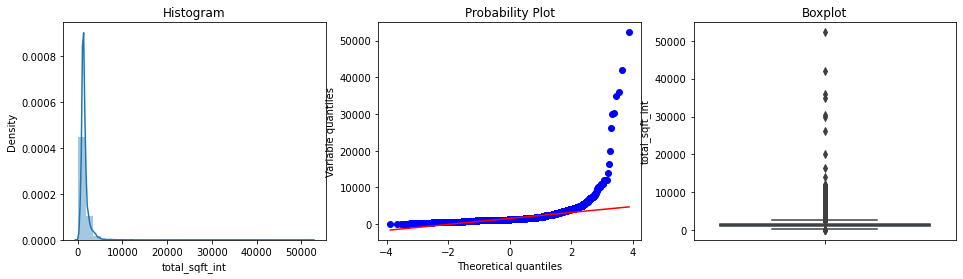

******* bhk *******


C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


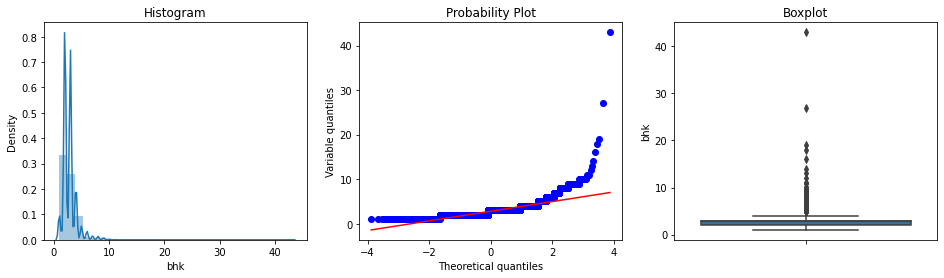

******* price *******


C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


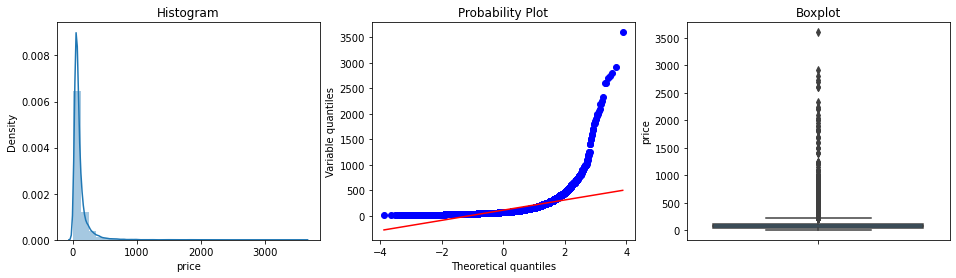

In [44]:
num_var=["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df7,var)
    

In [45]:
# here we consider 1 BHK requires min of 350 sqft
df7[df7['total_sqft_int']/df7['bhk'] <350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [46]:
# if 1 BHK total_sqft are < 350 then we are going to remove them
df8=df7[~(df7['total_sqft_int']/df7['bhk']<350)]
df8.shape

(12106, 10)

In [47]:
# create a new feature that is price per square foot
# it helps to find the outliers
# price in lakh so convert to rupees
df8['price_per_sqft']=df8['price']*100000/df8['total_sqft_int']
df8.head()

C:\Users\Rohan Singh\AppData\Local\Temp\ipykernel_9944\2281876384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft']=df8['price']*100000/df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [48]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
# here in above stats we see that max=176470 which should be removed

In [50]:
# Removing outliers using the help of 'price per sqft' taking std and mean per location
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9=remove_pps_outliers(df8)
df9.shape

(8888, 11)

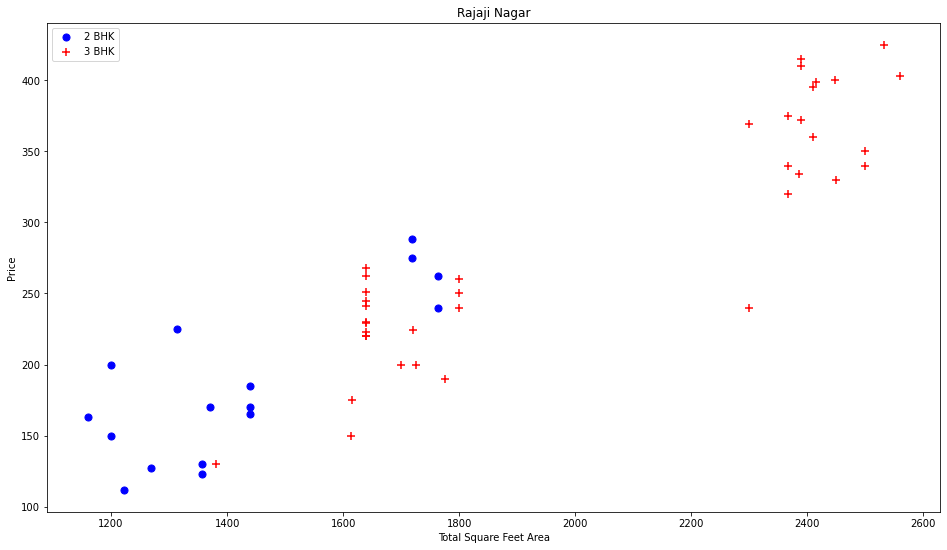

In [51]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft_int,bhk3.price,color='Red',label='3 BHK',s=50,marker="+")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df9,"Rajaji Nagar")


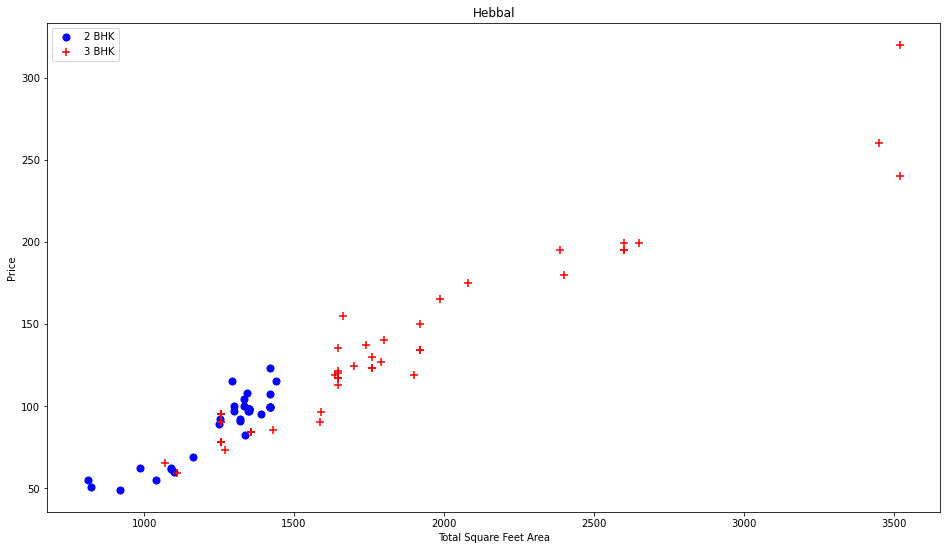

In [52]:
plot_scatter_chart(df9,"Hebbal")
# in below scatterplot we see that at same location, price of
# 3 BHK is less than 2 BHK so its a outlier and we have to remove it

In [53]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10=remove_bhk_outliers(df9)
df10.shape

(7194, 11)

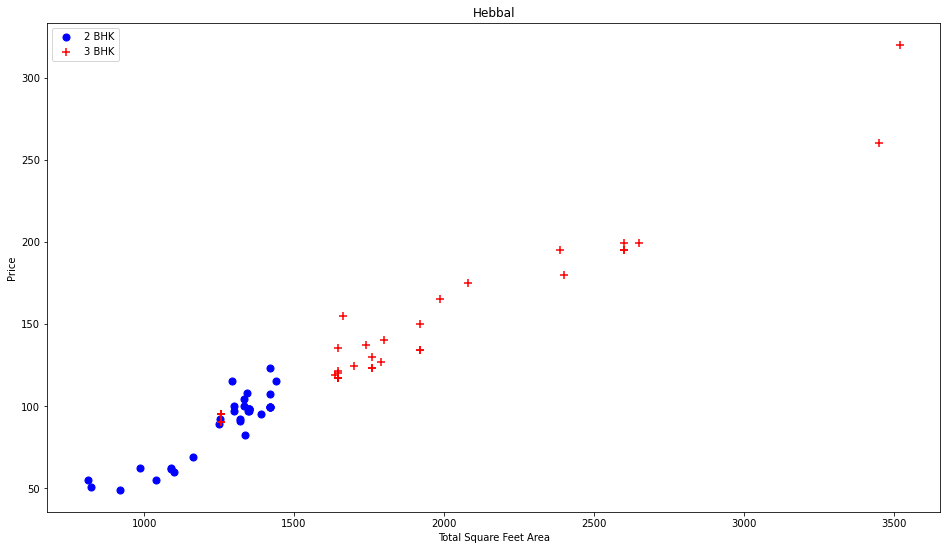

In [54]:
plot_scatter_chart(df10,"Hebbal")

In [55]:
# most of the red data points are removed from blue data points

# Remove outliers with the help of bath feature

In [56]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [57]:
df10[df10.bath>df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [58]:
# we are only considering total number of bathrooms=bhk+1

In [59]:
df11=df10[df10.bath<df10.bhk+2]
df11.shape

(7120, 11)

C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rohan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Roha

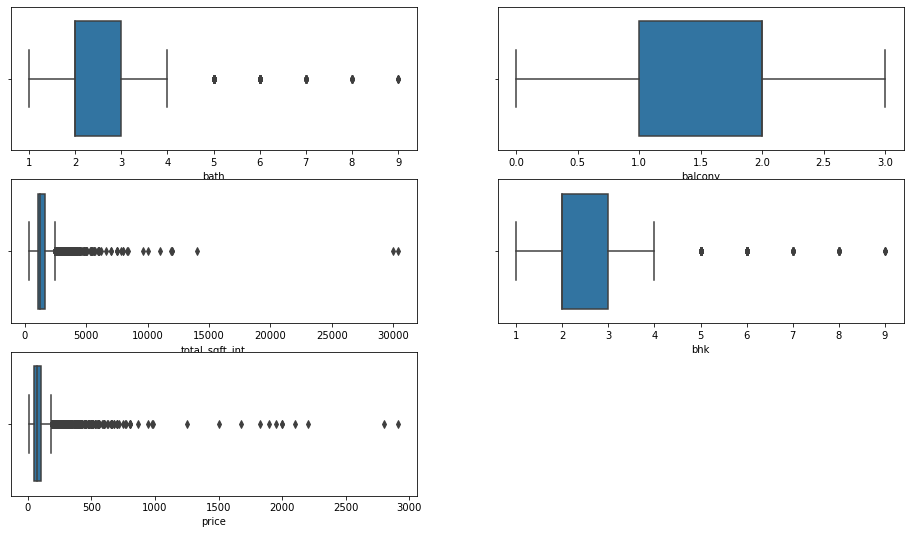

In [60]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])

In [61]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [62]:
df12=df11.drop(['area_type','availability','location','size','total_sqft'],axis=1)
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [63]:
df13=df11.drop(["size","total_sqft"],axis=1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [64]:
# we removed them to as we already converted size to bhk and tota_sqft to price_per_sqft

# One Hot Encoding for categorical variables

In [65]:
df14=pd.get_dummies(df13,drop_first=True,columns=['area_type','availability','location'])
df14.shape

(7120, 820)

In [66]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

In [67]:
# in area ,availability,location there are multiple classes and if we convert them to one hot encoding so it increases the size of dataframe so try to use classes which are frequently present in categorical variable

In [68]:
# working on "area_type" feature

In [69]:
df13['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [70]:
# apply one hot encoding on area type features
df15=df13.copy()
for cat_var in ["Super built-up Area","Built-up Area","Plot Area"]:
    df15["area_type"+cat_var]=np.where(df15['area_type']==cat_var,1,0)
df15.shape    

(7120, 12)

In [71]:
df15.head(5)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0


In [72]:
# Working on the availability feature

In [73]:
df15['availability'].value_counts()

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
20-Jan             18
18-Sep             18
18-Jan             17
17-Dec             14
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
17-May              6
21-Jul              6
20-Aug              6
17-Sep              6
20-Oct              6
20-Sep              5
21-Feb              5
21-Oct              4
20-Nov              4
17-Nov              4
17-Apr              4
22-Jan    

In [74]:
# here ready to move is the most important feature

In [75]:
df15["availability_Ready To Move"]=np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(7120, 13)

In [76]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8883,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,0,0,0,1
8884,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,0,0,0,0
8885,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,0,1
8886,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,0,0
8887,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,0,0


# working on location feature

In [77]:
location_value_count=df15['location'].value_counts()
location_value_count

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Hormavu    

In [78]:
location_20=location_value_count[location_value_count>=20].index
location_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur',
       'Varthur', 'HSR Layout', 'Hennur', 'Ramamurthy Nagar', 'Chandapura',
       'Koramangala', 'Kaggadasapura', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hulimavu', 'Hoodi', 'Malleshwaram', 'Hegde Nagar',
       'Yeshwanthpur', 'Gottigere', '8th Phase JP Nagar', 'JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Vittasandra', 'Indira Nagar',
       'Old Airport Road', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Hosa Road', 'Vijayanagar', 'Balagere', 'Green Glen Layout

In [79]:
df16=df15.copy()

In [80]:
for cat_var in location_20:
    df16['location_'+cat_var]=np.where(df16['location']==cat_var,1,0)
df16.shape    

C:\Users\Rohan Singh\AppData\Local\Temp\ipykernel_9944\542026046.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var,1,0)
C:\Users\Rohan Singh\AppData\Local\Temp\ipykernel_9944\542026046.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var,1,0)


(7120, 111)

In [81]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# Drop categorical variables
df17=df16.drop(["area_type","availability","location"],axis=1)
df17.shape

(7120, 108)

In [83]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
df17.to_csv('ohe_data_reduce_cat_class.csv',index=False)


# split the dataset for test and train

In [85]:
X=df17.drop("price",axis=1)
y=df17["price"]
print('shape of x= ',X.shape)
print('shape of y= ',y.shape)

shape of x=  (7120, 107)
shape of y=  (7120,)


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print('Shape of X_train ',X_train.shape)
print('Shape of X_test ',X_test.shape)
print('Shape of y_train ',y_train.shape)
print('Shape of y_train ',y_test.shape)

Shape of X_train  (5696, 107)
Shape of X_test  (1424, 107)
Shape of y_train  (5696,)
Shape of y_train  (1424,)


In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# Machine Learning Model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr_lasso=Lasso()
lr_ridge=Ridge()

In [89]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [90]:
lr.fit(X_train,y_train)
lr_score=lr.score(X_test,y_test)
lr_rmse=rmse(y_test,lr.predict(X_test))
lr_score,lr_rmse

(0.7897677387466134, 64.99371940930115)

In [91]:
# Lasso

In [92]:
lr_lasso.fit(X_train,y_train)
lr_lasso_score=lr_lasso.score(X_test,y_test)
lr_lasso_rmse=rmse(y_test,lr_lasso.predict(X_test))
lr_lasso_score,lr_lasso_rmse

(0.8038760090599336, 62.77505059562723)

# Support Vector Machine

In [93]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test)
svr_rmse=rmse(y_test,svr.predict(X_test))
svr_score,svr_rmse

(0.2161021361572849, 125.50223235155066)

# Random forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test)
rfr_rmse=rmse(y_test,rfr.predict(X_test))
rfr_score,rfr_rmse

(0.8900532654263267, 47.001625521791745)

In [95]:
import xgboost
xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test)
xgb_reg_rmse=rmse(y_test,xgb_reg.predict(X_test))
xgb_reg_score,xgb_reg_rmse

C:\Users\Rohan Singh\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


(0.8888705861310907, 47.25374378987799)

In [96]:
print(pd.DataFrame([{'Model':'Linear Regression','Score':lr_score,"RMSE":lr_rmse},
                   {'Model':'Lasso','Score':lr_lasso_score,"RMSE":lr_lasso_rmse},
                   {'Model':'Support Vector Machine','Score':svr_score,"RMSE":svr_rmse},
                   {'Model':'Random Forest','Score':rfr_score,"RMSE":rfr_rmse},
                    {'Model':'Xgboost','Score':xgb_reg_score,"RMSE":xgb_reg_rmse}
                   ],
                   columns=['Model','Score','RMSE']))

                    Model     Score        RMSE
0       Linear Regression  0.789768   64.993719
1                   Lasso  0.803876   62.775051
2  Support Vector Machine  0.216102  125.502232
3           Random Forest  0.890053   47.001626
4                 Xgboost  0.888871   47.253744


# Cross Validation

In [97]:
from sklearn.model_selection import KFold,cross_val_score
cvs=cross_val_score(xgb_reg,X_train,y_train,cv=10)
cvs,cvs.mean()

(array([0.9889028 , 0.98885255, 0.99569891, 0.98291697, 0.97119026,
        0.99620214, 0.97238833, 0.94324204, 0.99370346, 0.99300075]),
 0.9826098207113017)

In [98]:
# since the difference between accuracy and cvs score is 10% it means the model is overfit

In [99]:
cvs_rfr=cross_val_score(rfr,X_train,y_train,cv=10)
cvs_rfr,cvs_rfr.mean()

(array([0.99573754, 0.96211497, 0.99765587, 0.96221186, 0.95929705,
        0.96355912, 0.94355916, 0.91319573, 0.99692369, 0.99013645]),
 0.9684391429840706)

In [112]:
cvs_rfr2=cross_val_score(RandomForestRegressor(),X_train,y_train,cv=10)
cvs_rfr2,cvs_rfr2.mean()

(array([0.99368573, 0.96551931, 0.9970973 , 0.98869526, 0.95720143,
        0.94076107, 0.93077815, 0.91178653, 0.997077  , 0.99016812]),
 0.9672769899256759)

# Test

In [113]:
X.columns

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up Area', 'area_typeBuilt-up Area',
       'area_typePlot Area', 'availability_Ready To Move',
       'location_Whitefield',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_Hosur Road',
       'location_Hebbal Kempapura', 'location_BTM 2nd Stage',
       'location_Domlur', 'location_Horamavu Banaswadi',
       'location_Tumkur Road', 'location_Mahadevpura'],
      dtype='object', length=107)

In [114]:
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
  x =np.zeros(len(X.columns)) 
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft
 
  if "availability"=="Ready To Move":
    x[8]=1
 
  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1
 
  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1
  x = sc.transform([x])[0]
  return model.predict([x])[0]

In [118]:
predict_house_price(model=rfr, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Rohan Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


149.08

In [120]:
import joblib 
joblib.dump(rfr,'bangalore_prediction_model.pkl')

['bangalore_prediction_model.pkl']

In [121]:
bangalore_prediction_model=joblib.load("bangalore_prediction_model.pkl")

In [122]:
predict_house_price(bangalore_prediction_model, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Rohan Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


149.08

In [123]:
# price is 149 lakh 8 thousand